<a href="https://colab.research.google.com/github/MattWestCode/Matt_psu_quants_fork/blob/investing/SMA_Tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed
[382.17999267578125, 377.57000732421875, 378.0, 378.69000244140625, 376.510009765625, 376.5299987792969, 373.9200134277344, 373.05999755859375, 364.7200012207031, 355.70001220703125, 357.4800109863281, 343.2099914550781, 345.9599914550781, 352.9599914550781, 353.5799865722656, 340.6499938964844, 339.6099853515625, 339.3900146484375, 343.010009765625, 326.2300109863281, 332.9599914550781, 333.6400146484375, 329.2200012207031, 330.04998779296875, 325.45001220703125, 323.7699890136719, 324.5400085449219, 328.5299987792969, 324.760009765625, 335.3399963378906, 339.989990234375, 340.7799987792969, 341.8800048828125, 324.6099853515625, 328.69000244140625, 315.80999755859375, 312.2200012207031, 316.9200134277344, 323.57000732421875, 329.9800109863281, 328.0799865722656, 331.6199951171875, 335.8500061035156, 341.1300048828125, 338.6199951171875, 335.3699951171875, 327.6400146484375, 327.739990234375, 340.8900146484375, 347.55

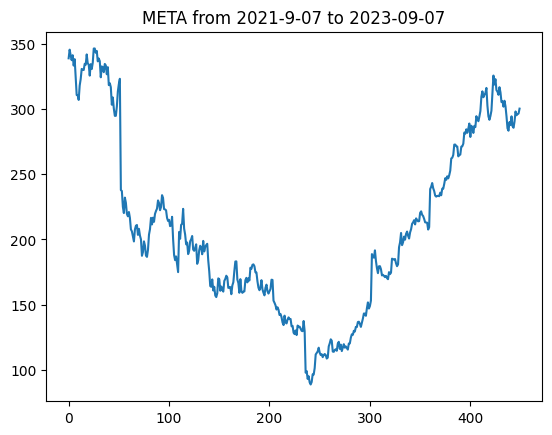

In [34]:
cash = 1000
shares = 0
# Data Variables
start_date = "2021-9-07"
end_date = "2023-09-07"
interval_time = "1d"
ticker = "META"
is_holding = False
current_holding_price = 0
sma_short_index = []
sma_long_index = []
return_index = []

# Strategy Variables
#sma_short_length = 82
#sma_long_length = 171

test_short = 0
test_long = 0

test_winner = [0,0,-100]
test_results = []
# Downloading backtest data
stock_data = yf.download(ticker,start=start_date, end=end_date, interval=interval_time)
stock_data = [float(i) for i in stock_data['Close']]
print(stock_data)


'''
# Generates Random Stock Movements
start_num = 250
range_num = 5
for i in range(0, 200):
  n = random.randint(start_num - range_num, start_num + range_num)
  data.append(n)
  start_num = n
print(data)
'''


#Main

for sma_short_length in range(1,200):
  for sma_long_length in range(1,200):
    if sma_short_length < sma_long_length:
      cash = 1000
      shares = 0
      is_holding = False
      for i in range(0, len(stock_data)-sma_long_length):



        sma_short = sum(stock_data[sma_long_length-sma_short_length+i:i+sma_long_length])/sma_short_length
        sma_long = sum(stock_data[i:i+sma_long_length])/sma_long_length

        #sma_short_index.append(sma_short)
        #sma_long_index.append(sma_long)



        #print (stock_data[i+sma_long_length], sma_short, sma_long, i, consolidation_indicator)

      # Consolidation Signals




      # Buy / Sell Signals
        if (sma_short > sma_long) and is_holding == False:
          is_holding = True
          current_holding_price = stock_data[i+sma_long_length]
          shares = cash/current_holding_price
          cash = 0
          #print("-"*100)
          #print("BUY, CURRENT PRICE:" + str(current_holding_price), cash)
          #print(shares, cash)
          #print("-"*100)


        if (sma_short < sma_long) and is_holding == True:
          is_holding = False
          #return_index.append((stock_data[i+sma_long_length]-current_holding_price)/current_holding_price)
          current_holding_price = stock_data[i+sma_long_length]
          cash = cash + current_holding_price * shares
          shares = 0
          #print("-"*100)
          #print("SELL, CURRENT PRICE:" + str(current_holding_price), cash)
          #print(shares, cash)
          #print("Current Return: " + str(((cash-1000)/1000)*100)+'%')
         # print("-"*100)


      if is_holding == True:
        cash = cash + shares * stock_data[-1]
      if (((cash-1000)/1000)*100) > test_winner[2]:
        test_winner = [sma_short_length, sma_long_length, ((cash-1000)/1000)*100, (stock_data[-1]-stock_data[sma_long_length])/(stock_data[sma_long_length])*100]
      test_results.append([sma_short_length, sma_long_length, ((cash-1000)/1000)*100])


print(test_winner)
print(test_results)
#[82, 171, 2364915406340.0845, 1529.1442217080044]
'''

for i in range(0, len(stock_data)-sma_long_length):



      sma_short = sum(stock_data[sma_long_length-sma_short_length+i:i+sma_long_length])/sma_short_length
      sma_long = sum(stock_data[i:i+sma_long_length])/sma_long_length

      sma_short_index.append(sma_short)
      sma_long_index.append(sma_long)



      #print (stock_data[i+sma_long_length], sma_short, sma_long, i, consolidation_indicator)

    # Consolidation Signals




    # Buy / Sell Signals
      if (sma_short > sma_long) and is_holding == False:
        is_holding = True
        current_holding_price = stock_data[i+sma_long_length]
        shares = cash/current_holding_price
        cash = 0
        print("-"*100)
        print("BUY, CURRENT PRICE:" + str(current_holding_price), cash)
        print(shares, cash)
        print("-"*100)


      if (sma_short < sma_long) and is_holding == True:
        is_holding = False
        return_index.append((stock_data[i+sma_long_length]-current_holding_price)/current_holding_price)
        current_holding_price = stock_data[i+sma_long_length]
        cash = cash + current_holding_price * shares
        shares = 0
        print("-"*100)
        print("SELL, CURRENT PRICE:" + str(current_holding_price), cash)
        print(shares, cash)
        print("Current Return: " + str(((cash-1000)/1000)*100)+'%')
        print("-"*100)



if is_holding == True:
  cash = cash + shares * stock_data[-1]
  return_index.append((stock_data[i+sma_long_length]-current_holding_price)/current_holding_price)
avg_return = str(((cash-1000)/1000)*100)+'%'
print(return_index)
print(cash, avg_return)
print(str(((stock_data[-1]-stock_data[sma_long_length])/stock_data[sma_long_length])*100)+"%")
'''
plt.plot(stock_data[test_winner[1]:-1], label = ticker)
plt.plot(sma_short_index, label = str(test_winner[0]) + 'MA')
plt.plot(sma_long_index, label = str(test_winner[1]) + 'MA')
plt.title(ticker + " from " + start_date + " to " + end_date)
plt.show()
